# 任务大纲：

1. **数据收集**
   - **获取City Bike历史数据**
     - 从纽约City Bike官网下载骑行数据，包括行程ID、起点、终点、时长、会员状态等。
   - **获取天气数据**
     - 从天气网站下载对应日期的天气信息，如平均气温、降雨情况等。

2. **数据处理**
   - **数据清洗**
     - 处理缺失值和异常值。
   - **数据合并**
     - 将骑行数据与天气数据根据日期进行合并。

3. **数据分析与可视化**
   - **会员与非会员使用习惯比较**
     - 分析他们在一周中不同天的使用频率。
     - 绘制柱状图或折线图展示差异。

4. **天气影响分析**
   - **气温影响**
     - 分析不同气温下的骑行量。
     - 绘制气温与使用量的关系图。
   - **降雨影响**
     - 比较下雨天与晴天的骑行量。

5. **模型构建与预测**
   - **选择模型**

   - **模型训练**
     - 用历史数据训练模型。
   - **模型预测**
     - 输入特定的天气条件（如气温25度），预测预期的骑行用户数量。

6. **结果总结**
   - **报告撰写**

1. **数据收集与准备**

2. **数据处理**

CitiBike 行程数据集，使用了 2023 年的数据，由于计算限制，我创建了 1/1000 的样本。这些样本是非确定性创建的，通过从文件中随机选择“r nrow(file)/1000”来创建。

In [3]:
import pandas as pd

# 加载清洗和采样后的 Citi Bike 数据
citibike_file = 'E:/BloombergIntern/W3citybike2023/citibike_sampled_cleaned_2023.csv'
citibike_data = pd.read_csv(citibike_file, parse_dates=['started_at', 'ended_at'])

# 加载 2023 年的天气数据
weather_file = 'E:/BloombergIntern/W3citybike2023/meteostat_weather_2023.csv'
weather_data = pd.read_csv(weather_file)

# 确保天气数据中有 'date' 列，且格式为日期
# 如果 'weather_data' 中的日期列名称不同，请相应修改
# 假设 'weather_data' 中有 'date' 列
# 如果没有，请创建一个
if 'date' not in weather_data.columns:
    # 假设天气数据中有 'year', 'month', 'day' 列
    weather_data['date'] = pd.to_datetime(weather_data[['year', 'month', 'day']]).dt.date

# 从骑行数据中提取日期
citibike_data['date'] = citibike_data['started_at'].dt.date

# 合并骑行数据和天气数据，按 'date' 列匹配
merged_data = pd.merge(citibike_data, weather_data, on='date', how='left')

# 保存合并后的数据
merged_output_file = 'E:/BloombergIntern/W3citybike2023/merged_citibike_weather_2023.csv'
merged_data.to_csv(merged_output_file, index=False)
print(f"\n合并后的数据已保存到 {merged_output_file}")

# 按日聚合骑行次数和天气数据
daily_merged_data = merged_data.groupby('date').agg({
    'ride_id': 'count',
    'avg_temp': 'mean',
    'min_temp': 'mean',
    'max_temp': 'mean',
    'precipitation': 'mean',
    'wind_speed': 'mean'
}).reset_index()

# 将 'ride_id' 计数重命名为 'ride_count'
daily_merged_data.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# 打印每日合并数据的前五行以验证
print("\nDaily merged data (first 5 rows):")
print(daily_merged_data.head())

# 保存每日聚合后的数据
daily_output_file = 'E:/BloombergIntern/W3citybike2023/daily_merged_citibike_weather_2023.csv'
daily_merged_data.to_csv(daily_output_file, index=False)
print(f"\n每日合并数据已保存到 {daily_output_file}")


C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\692358869.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_data = pd.read_csv(citibike_file, parse_dates=['started_at', 'ended_at'])



合并后的数据已保存到 E:/BloombergIntern/W3citybike2023/merged_citibike_weather_2023.csv

Daily merged data (first 5 rows):
         date  ride_count  avg_temp  min_temp  max_temp  precipitation  \
0  2023-01-01         519       NaN       NaN       NaN            NaN   
1  2023-01-02         538       NaN       NaN       NaN            NaN   
2  2023-01-03         510       NaN       NaN       NaN            NaN   
3  2023-01-04         770       NaN       NaN       NaN            NaN   
4  2023-01-05         720       NaN       NaN       NaN            NaN   

   wind_speed  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

每日合并数据已保存到 E:/BloombergIntern/W3citybike2023/daily_merged_citibike_weather_2023.csv


C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\3448698816.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_data = pd.read_csv(citibike_file, parse_dates=['started_at', 'ended_at'])


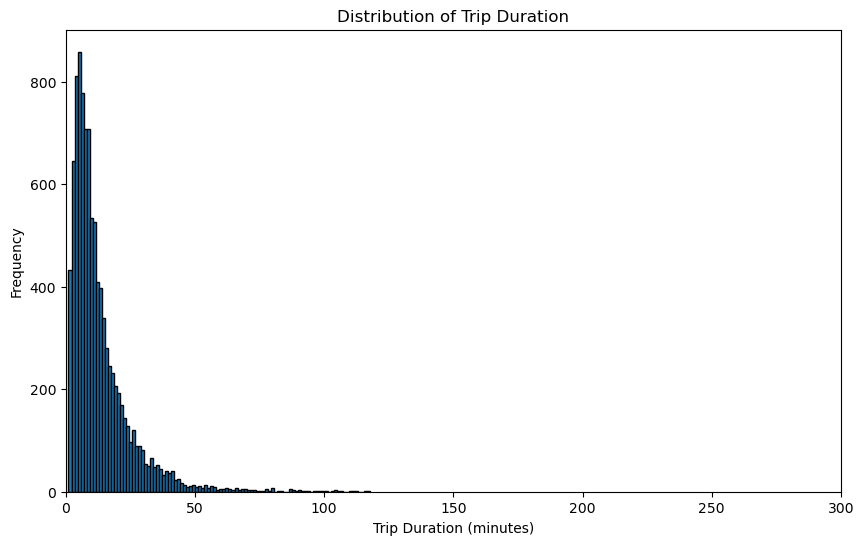

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载清洗和采样后的 Citi Bike 数据
citibike_file = 'E:/BloombergIntern/W3citybike2023/citibike_sampled_cleaned_2023.csv'
citibike_data = pd.read_csv(citibike_file, parse_dates=['started_at', 'ended_at'])

# 计算骑行时长（分钟）
citibike_data['ride_duration'] = (citibike_data['ended_at'] - citibike_data['started_at']).dt.total_seconds() / 60

# 创建 sampled_df，随机抽取 10,000 条记录以加快绘图速度
sampled_df = citibike_data.sample(n=10000, random_state=42)

# 可视化骑行时长的分布
plt.figure(figsize=(10, 6))
plt.hist(sampled_df['ride_duration'], bins=100, edgecolor='black')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.xlim(0, 300)  # 仅查看0到300分钟的时长，避免因异常值导致的过度拉伸
plt.show()

计算起点和终点站之间的距离

In [7]:
import pandas as pd
from geopy.distance import geodesic

# 加载清洗后的和采样的 Citi Bike 数据
citibike_file = 'E:/BloombergIntern/W3citybike2023/citibike_sampled_cleaned_2023.csv'
citibike_data = pd.read_csv(citibike_file, parse_dates=['started_at', 'ended_at'])

# 定义一个函数来计算两个点（纬度和经度）之间的距离
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])  # 获取起点坐标
    end_coords = (row['end_lat'], row['end_lng'])        # 获取终点坐标
    return geodesic(start_coords, end_coords).kilometers  # 使用 Haversine 公式计算距离（单位：公里）

# 对每一行数据应用距离计算函数
citibike_data['distance_km'] = citibike_data.apply(calculate_distance, axis=1)

# 可选：计算纬度和经度之间的绝对差值
citibike_data['dist_lat'] = abs(citibike_data['start_lat'] - citibike_data['end_lat'])
citibike_data['dist_lng'] = abs(citibike_data['start_lng'] - citibike_data['end_lng'])

# 显示计算得到的距离的汇总信息
print("\n距离（公里）统计摘要：")
print(citibike_data['distance_km'].describe())

# 保存包含距离列的更新后的数据集
updated_output_file = 'E:/BloombergIntern/W3citybike2023/citibike_with_distances_2023.csv'
citibike_data.to_csv(updated_output_file, index=False)
print(f"\n包含距离的更新数据已保存到 {updated_output_file}")


C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\232358080.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_data = pd.read_csv(citibike_file, parse_dates=['started_at', 'ended_at'])



距离（公里）统计摘要：
count    349090.000000
mean          1.926598
std           1.736880
min           0.000000
25%           0.785831
50%           1.413128
75%           2.499942
max          24.176720
Name: distance_km, dtype: float64

包含距离的更新数据已保存到 E:/BloombergIntern/W3citybike2023/citibike_with_distances_2023.csv


添加行程开始时间、星期几以及是否是工作日的列

In [8]:
import pandas as pd

# 加载 Citi Bike 数据
citibike_file = 'E:/BloombergIntern/W3citybike2023/citibike_sampled_cleaned_2023.csv'
citibike_data = pd.read_csv(citibike_file, parse_dates=['started_at', 'ended_at'])

# 特征提取
# 添加 'start_date' 列（提取行程的开始日期）
citibike_data['start_date'] = citibike_data['started_at'].dt.date

# 添加 'dayofweek' 列（提取行程开始的星期几，0 表示周一，6 表示周日）
citibike_data['dayofweek'] = citibike_data['started_at'].dt.dayofweek

# 添加 'is_weekday' 列（判断行程是否发生在工作日，周一到周五为工作日）
citibike_data['is_weekday'] = citibike_data['started_at'].dt.weekday < 5

# 打印前几行数据以确认
print("\n数据集中包含新增特征的前五行：")
print(citibike_data.head())

# 保存更新后的数据集
updated_output_file = 'E:/BloombergIntern/W3citybike2023/citibike_with_features_2023.csv'
citibike_data.to_csv(updated_output_file, index=False)
print(f"\n包含新增特征的信息的数据已保存到 {updated_output_file}")


C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\2155362229.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_data = pd.read_csv(citibike_file, parse_dates=['started_at', 'ended_at'])



数据集中包含新增特征的前五行：
            ride_id  rideable_type              started_at  \
0  654C13B23F75720F  electric_bike 2023-08-01 19:11:13.917   
1  4A6AD84D1678C2BF   classic_bike 2023-12-04 16:02:48.656   
2  6F23B7CFD153B060  electric_bike 2023-01-22 13:47:42.586   
3  B046F67BF8D00FD4  electric_bike 2023-07-26 21:02:40.248   
4  40316B4BBE42DB94   classic_bike 2023-06-20 13:12:05.431   

                 ended_at           start_station_name start_station_id  \
0 2023-08-01 19:38:37.345       Hanson Pl & Ashland Pl          4395.07   
1 2023-12-04 16:30:13.045        West St & Chambers St          5329.03   
2 2023-01-22 13:54:17.697         Roebling St & N 4 St          5267.09   
3 2023-07-26 21:23:49.546           S 4 St & Wythe Ave          5204.05   
4 2023-06-20 13:43:08.595  Carroll St & Washington Ave          3887.03   

           end_station_name end_station_id  start_lat  start_lng    end_lat  \
0       Douglass St & 3 Ave        4217.02  40.685061 -73.977666  40.680213   
1

In [9]:
import pandas as pd

# 加载包含新增特征的数据集
updated_output_file = 'E:/BloombergIntern/W3citybike2023/citibike_with_features_2023.csv'
citibike_data = pd.read_csv(updated_output_file, parse_dates=['started_at', 'ended_at'])

# 打印包含新增特征的数据集的前几行
print("\n数据集中包含新增特征的前五行：")
print(citibike_data.head())


C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\4026887411.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_data = pd.read_csv(updated_output_file, parse_dates=['started_at', 'ended_at'])



数据集中包含新增特征的前五行：
            ride_id  rideable_type              started_at  \
0  654C13B23F75720F  electric_bike 2023-08-01 19:11:13.917   
1  4A6AD84D1678C2BF   classic_bike 2023-12-04 16:02:48.656   
2  6F23B7CFD153B060  electric_bike 2023-01-22 13:47:42.586   
3  B046F67BF8D00FD4  electric_bike 2023-07-26 21:02:40.248   
4  40316B4BBE42DB94   classic_bike 2023-06-20 13:12:05.431   

                 ended_at           start_station_name start_station_id  \
0 2023-08-01 19:38:37.345       Hanson Pl & Ashland Pl          4395.07   
1 2023-12-04 16:30:13.045        West St & Chambers St          5329.03   
2 2023-01-22 13:54:17.697         Roebling St & N 4 St          5267.09   
3 2023-07-26 21:23:49.546           S 4 St & Wythe Ave          5204.05   
4 2023-06-20 13:43:08.595  Carroll St & Washington Ave          3887.03   

           end_station_name end_station_id  start_lat  start_lng    end_lat  \
0       Douglass St & 3 Ave        4217.02  40.685061 -73.977666  40.680213   
1

In [10]:
import pandas as pd

# 加载包含新增特征的数据集
updated_output_file = 'E:/BloombergIntern/W3citybike2023/citibike_with_features_2023.csv'
citibike_data = pd.read_csv(updated_output_file, parse_dates=['started_at', 'ended_at'])

# 打印所有列名称
print("所有列名称：")
print(citibike_data.columns)


C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\1604364538.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_data = pd.read_csv(updated_output_file, parse_dates=['started_at', 'ended_at'])


所有列名称：
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_duration', 'start_date', 'dayofweek',
       'is_weekday'],
      dtype='object')


合并我们准备好的1，共享单车数据集 2，天气数据集

In [11]:
import pandas as pd

# 读取 CitiBike 和天气数据
citibike_file = 'E:/BloombergIntern/W3citybike2023/citibike_with_features_2023.csv'
weather_file = 'E:/BloombergIntern/W3citybike2023/meteostat_weather_2023.csv'

# 读取清洗后的 Citibike 数据集
citibike_data = pd.read_csv(citibike_file, parse_dates=['started_at', 'ended_at'])

# 读取天气数据集
weather_data = pd.read_csv(weather_file)

# 将 CitiBike 数据集中的 'started_at' 列提取日期并存为 'start_date'
citibike_data['start_date'] = citibike_data['started_at'].dt.date

# 确保天气数据集中的 'date' 列为 datetime 格式并提取日期
weather_data['date'] = pd.to_datetime(weather_data['date']).dt.date

# 将 Citibike 数据和天气数据合并，基于 'start_date' 和 'date' 进行合并
merged_data = pd.merge(citibike_data, weather_data, left_on='start_date', right_on='date', how='inner')

# 删除多余的 'date' 列（合并后它和 'start_date' 是相同的）
merged_data.drop(columns=['date'], inplace=True)

# 查看合并后的数据集的前几行
print("\n合并后的数据集前五行：")
print(merged_data.head())

# 保存合并后的数据集
merged_output_file = 'E:/BloombergIntern/W3citybike2023/citibike_weather_merged_2023.csv'
merged_data.to_csv(merged_output_file, index=False)
print(f"\n合并后的数据集已保存到 {merged_output_file}")


C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\3152997062.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_data = pd.read_csv(citibike_file, parse_dates=['started_at', 'ended_at'])



合并后的数据集前五行：
            ride_id  rideable_type              started_at  \
0  654C13B23F75720F  electric_bike 2023-08-01 19:11:13.917   
1  8879936C908D3476   classic_bike 2023-08-01 20:06:57.827   
2  2A83F5329441B8F4  electric_bike 2023-08-01 16:04:58.504   
3  553784E8C2A9DC1A  electric_bike 2023-08-01 08:44:56.171   
4  07E0901A6C818B06   classic_bike 2023-08-01 14:36:09.275   

                 ended_at      start_station_name start_station_id  \
0 2023-08-01 19:38:37.345  Hanson Pl & Ashland Pl          4395.07   
1 2023-08-01 20:12:44.402   N 12 St & Bedford Ave          5450.04   
2 2023-08-01 16:10:58.545     Clark St & Henry St          4789.03   
3 2023-08-01 09:01:36.373     Park Ave & E 124 St          7682.01   
4 2023-08-01 14:42:02.394        W 111 St & 5 Ave          7587.16   

                end_station_name end_station_id  start_lat  start_lng  ...  \
0            Douglass St & 3 Ave        4217.02  40.685061 -73.977666  ...   
1            Kent Ave & Grand St     

到目前为止我们已经完成了任务1和2

3. **数据分析与可视化**
#
3.1： 会员与非会员的日常使用习惯（按星期）
#
目的：帮助理解用户是否更倾向于在工作日还是周末使用，会员和非会员在使用时的偏好是否存在显著差异。
#
3.2：会员与非会员的骑行距离和时长分布
#
目的：帮助了解不同用户群体的出行需求。通过此分析，可以为运营者提供差异化定价或营销策略的依据。例如，如果非会员更倾向于观光使用，可以考虑推出旅游导向的营销或者优惠活动，而会员可以获得针对通勤的长期套餐。

C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\3007773584.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_data = pd.read_csv(merged_file, parse_dates=['started_at', 'ended_at'])


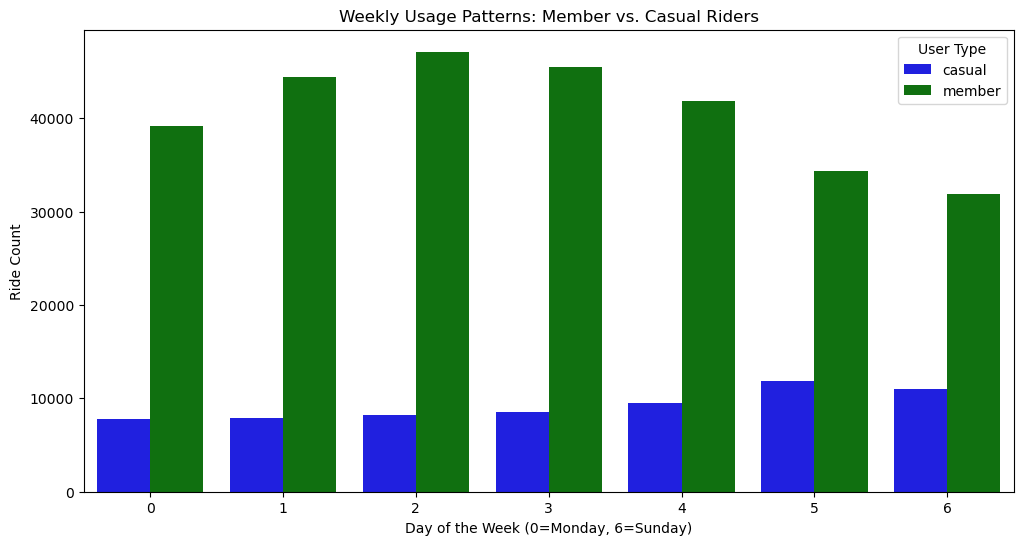

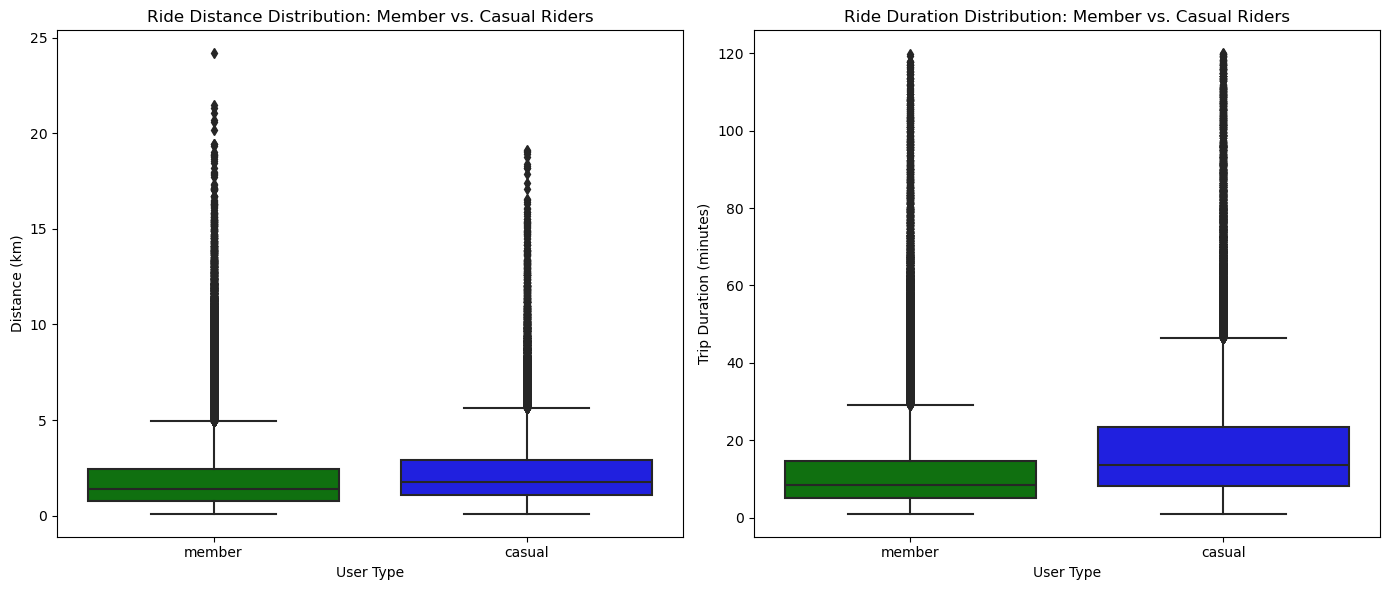

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

# 加载合并后的 Citi Bike 和天气数据
merged_file = 'E:/BloombergIntern/W3citybike2023/citibike_weather_merged_2023.csv'
citibike_data = pd.read_csv(merged_file, parse_dates=['started_at', 'ended_at'])

# 3.1 会员与非会员的日常使用习惯（按星期）
# 按星期几统计会员与非会员的骑行次数
weekly_usage = citibike_data.groupby(['dayofweek', 'member_casual']).size().reset_index(name='ride_count')

# 绘制日常使用习惯的比较图（按星期）
plt.figure(figsize=(12, 6))
# 固定颜色，会员（绿色），非会员（蓝色）
sns.barplot(data=weekly_usage, x='dayofweek', y='ride_count', hue='member_casual', palette={'member': 'green', 'casual': 'blue'})
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Ride Count')
plt.title('Weekly Usage Patterns: Member vs. Casual Riders')
plt.legend(title='User Type', loc='upper right')
plt.show()

# 3.2 会员与非会员的骑行距离和时长分布
# 定义一个函数来计算两个点（纬度和经度）之间的距离
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])  # 获取起点坐标
    end_coords = (row['end_lat'], row['end_lng'])        # 获取终点坐标
    return geodesic(start_coords, end_coords).kilometers  # 使用 Haversine 公式计算距离（单位：公里）

# 对每一行数据应用距离计算函数
citibike_data['distance_km'] = citibike_data.apply(calculate_distance, axis=1)

# 过滤掉异常的骑行时长和距离，以免影响分析
filtered_data = citibike_data[
    (citibike_data['ride_duration'] >= 1) & 
    (citibike_data['ride_duration'] <= 240) & 
    (citibike_data['distance_km'] >= 0.1)
]

# 绘制骑行距离和时长分布的比较（会员 vs 非会员）
plt.figure(figsize=(14, 6))

# 距离分布（箱线图）
plt.subplot(1, 2, 1)
# 固定颜色，会员（绿色），非会员（蓝色）
sns.boxplot(data=filtered_data, x='member_casual', y='distance_km', palette={'member': 'green', 'casual': 'blue'})
plt.xlabel('User Type')
plt.ylabel('Distance (km)')
plt.title('Ride Distance Distribution: Member vs. Casual Riders')

# 时长分布（箱线图）
plt.subplot(1, 2, 2)
# 固定颜色，会员（绿色），非会员（蓝色）
sns.boxplot(data=filtered_data, x='member_casual', y='ride_duration', palette={'member': 'green', 'casual': 'blue'})
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.title('Ride Duration Distribution: Member vs. Casual Riders')

plt.tight_layout()
plt.show()

图表分析
图1：
#
**会员**：
-会员的使用量在工作日（星期一至星期五）显著高于周末。
-会员的骑行量在周三达到最高，周三之后略有下降，但仍保持在较高水平。这表明会员用户更倾向于在工作日骑行，可能主要用于通勤。
#
**非会员**：
-非会员用户在周末（星期六和星期日）比工作日的骑行量略高，这可能意味着他们更多出于休闲目的租用自行车。
-与会员相比，非会员的使用量在一周内相对平稳，差异不大，但在周末有小幅上升。

图2（左图）：
#
**会员**：
-距离分布较为集中，且整体较短，约集中在 1-2 公里范围内。
中位数和上四分位数均较低，表明大部分会员用户的骑行距离短。这种分布可能反映了会员主要将共享单车作为日常通勤的工具，短途出行。
#
**非会员**：
-骑行距离的分布相比会员更为分散，整体的箱体高度更大。
中位数较高，且上四分位范围也相对更大，表明非会员用户通常骑行更远的距离。这可能是因为非会员更倾向于长时间的观光或探索骑行。

图2（右图）：
#
**会员**：
-会员用户的骑行时长较短，主要集中在 10-20 分钟之间，反映了会员主要使用共享单车进行短时通勤。
#
**非会员**：
-非会员用户的骑行时长则相对较长，且分布更广泛，整体箱体也更大，反映出骑行时间的较大差异。图中出现了较多的长尾和异常值，这些异常值表明部分非会员用户进行了较长时间的骑行。这通常发生在休闲、观光、旅游等情景中，骑行的时间更自由灵活。

**总体结论**：
会员用户的骑行时长相对较短且稳定，符合通勤的特征，通常集中在 10-20 分钟内，表明会员倾向于快速、高频的短途出行。
非会员用户的骑行时长则较长且分布范围较广，显示了他们在骑行活动中存在观光和娱乐等用途，因此骑行时间不固定，通常较长，带有更多的休闲性质。
这些特征差异对于服务提供商制定营销策略和优化产品有重要价值。
#
例如，会员用户可针对短途通勤提供更优惠的价格，而对于非会员，可以考虑增加骑行的娱乐性和提供相应的长时间租赁优惠，如观光套餐。
#
广告与营销方面也可以针对不同的用户群体进行。针对**会员用户**可以推行月度通勤优惠，鼓励早晚高峰时段的日常使用。推荐奖励计划：鼓励会员邀请朋友加入，提供推荐奖励以增加会员数量。针对**非会员用户**可以推出适合观光和长时间骑行的旅游导向套餐，如城市观光优惠。在周末或节假日提供折扣，吸引休闲骑行的用户。

4. **天气影响分析**
#
4.1： 气温影响分析
#
目的：分析不同温度下的骑行量，以了解气温对共享单车使用量的影响。
#
4.2：降雨影响分析
#
目的：比较下雨天与晴天的骑行量，观察降雨对骑行行为的影响。

C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\948187741.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_data = pd.read_csv(merged_file, parse_dates=['started_at', 'ended_at'])
C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\948187741.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_usage = citibike_data.groupby(['temp_category', 'member_casual']).size().reset_index(name='ride_count')
e:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
e:\anaco

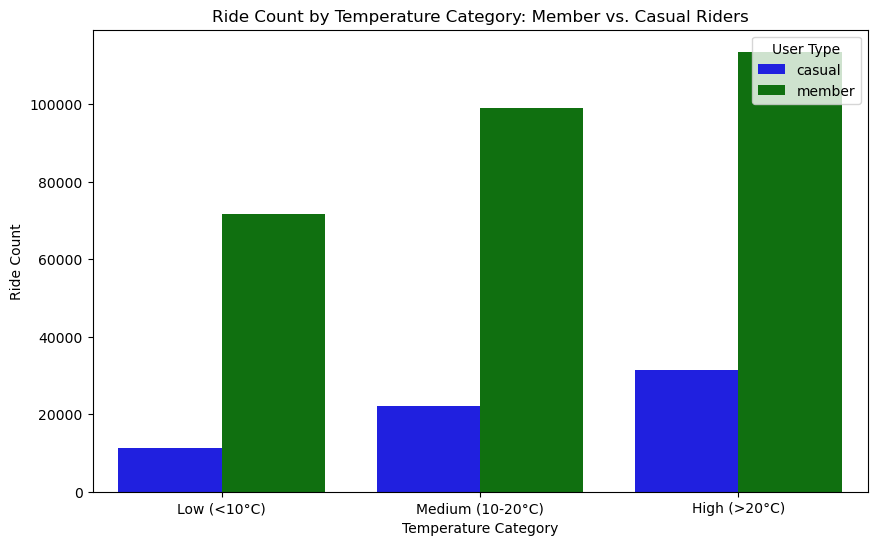

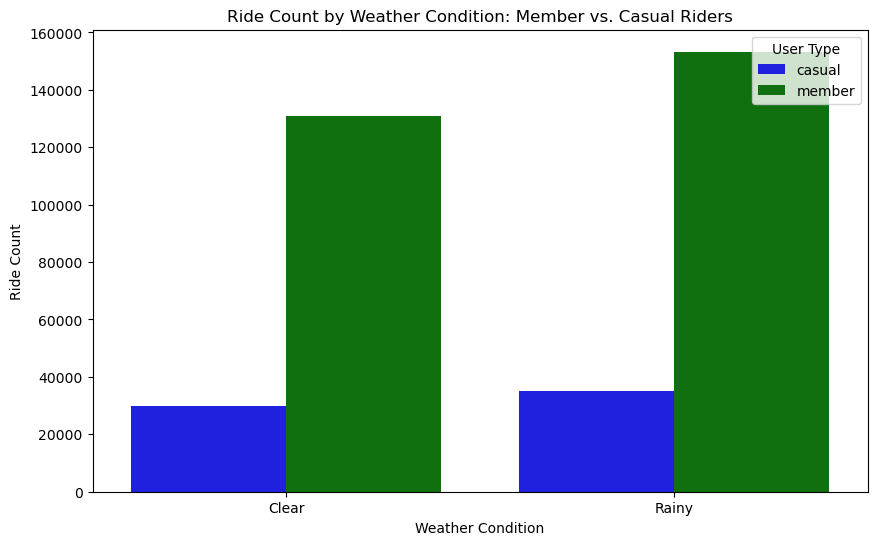

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载合并后的 Citi Bike 和天气数据
merged_file = 'E:/BloombergIntern/W3citybike2023/citibike_weather_merged_2023.csv'
citibike_data = pd.read_csv(merged_file, parse_dates=['started_at', 'ended_at'])

# 4.1 不同温度下的骑行量
# 根据平均气温将数据分为低温(<10°C)、中温(10-20°C)、高温(>20°C) 三个区间
citibike_data['temp_category'] = pd.cut(citibike_data['avg_temp'], bins=[-float('inf'), 10, 20, float('inf')], labels=['Low (<10°C)', 'Medium (10-20°C)', 'High (>20°C)'])

# 统计每个温度区间的骑行次数
temp_usage = citibike_data.groupby(['temp_category', 'member_casual']).size().reset_index(name='ride_count')

# 绘制骑行量与温度关系的条形图
plt.figure(figsize=(10, 6))
# 固定颜色，会员（绿色），非会员（蓝色）
sns.barplot(data=temp_usage, x='temp_category', y='ride_count', hue='member_casual', palette={'member': 'green', 'casual': 'blue'})
plt.xlabel('Temperature Category')
plt.ylabel('Ride Count')
plt.title('Ride Count by Temperature Category: Member vs. Casual Riders')
plt.legend(title='User Type', loc='upper right')
plt.show()

# 4.2 下雨天与晴天的骑行量
# 定义一个新列来判断天气状况，降水量大于 0 认为是雨天
citibike_data['weather_condition'] = citibike_data['precipitation'].apply(lambda x: 'Rainy' if x > 0 else 'Clear')

# 统计不同天气状况下的骑行次数
weather_usage = citibike_data.groupby(['weather_condition', 'member_casual']).size().reset_index(name='ride_count')

# 绘制骑行量与天气关系的条形图
plt.figure(figsize=(10, 6))
# 固定颜色，会员（绿色），非会员（蓝色）
sns.barplot(data=weather_usage, x='weather_condition', y='ride_count', hue='member_casual', palette={'member': 'green', 'casual': 'blue'})
plt.xlabel('Weather Condition')
plt.ylabel('Ride Count')
plt.title('Ride Count by Weather Condition: Member vs. Casual Riders')
plt.legend(title='User Type', loc='upper right')
plt.show()

 图4：
 #
 **高温（>20°C）**：会员和非会员的骑行量都最多，温暖的天气显然更吸引用户使用。
 #
 **中温（10-20°C）**：会员的骑行量依然很高，而非会员则明显减少，这表明中温天气下，会员仍愿意使用自行车。
#
 **低温（<10°C）**：骑行量显著下降，尤其是非会员几乎很少使用自行车。这表明低温天气对非会员来说是一个较大的阻碍因素。
#
**结论**：从骑行量来看，天气温暖时骑行最受欢迎。不管是什么温度会员的使用率都比非会员的使用量多出很多，几乎3倍。

 图5：
 #
 **雨天**：会员与非会员的骑行量同样的都显示在雨天更高，会员的骑行量依然明显高于非会员。
 #
 **晴天**：晴天的骑行量低于雨天。
 #
**结论**：会员不受天气的影响较大，即使在雨天仍有大量骑行，显示出他们对骑行的高依赖性。这为运营者提供了差异化市场策略的依据，例如为用户提供专门的雨具或激励政策来保持骑行量的稳定。


5. **模型构建与预测**

查看天气中的气温范围，是最低－13.3°C，最高33.9°C。

In [14]:
import pandas as pd

# Load the merged Citi Bike and weather dataset
# Make sure to replace the file path with the actual path to your dataset
merged_file = 'E:/BloombergIntern/W3citybike2023/citibike_weather_merged_2023.csv'
citibike_data = pd.read_csv(merged_file, parse_dates=['started_at', 'ended_at'])

# Calculate the minimum and maximum temperatures from the dataset
min_temp = citibike_data['min_temp'].min()
max_temp = citibike_data['max_temp'].max()

# Print the results
print(f"The minimum temperature in the dataset is: {min_temp}°C")
print(f"The maximum temperature in the dataset is: {max_temp}°C")

C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\3413721881.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_data = pd.read_csv(merged_file, parse_dates=['started_at', 'ended_at'])


The minimum temperature in the dataset is: -13.3°C
The maximum temperature in the dataset is: 33.9°C


绘制heatmap查看不同特征与用户使用量ride_count之间的相关性

C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\2805663380.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  citibike_data = pd.read_csv(merged_file, parse_dates=['started_at', 'ended_at'])


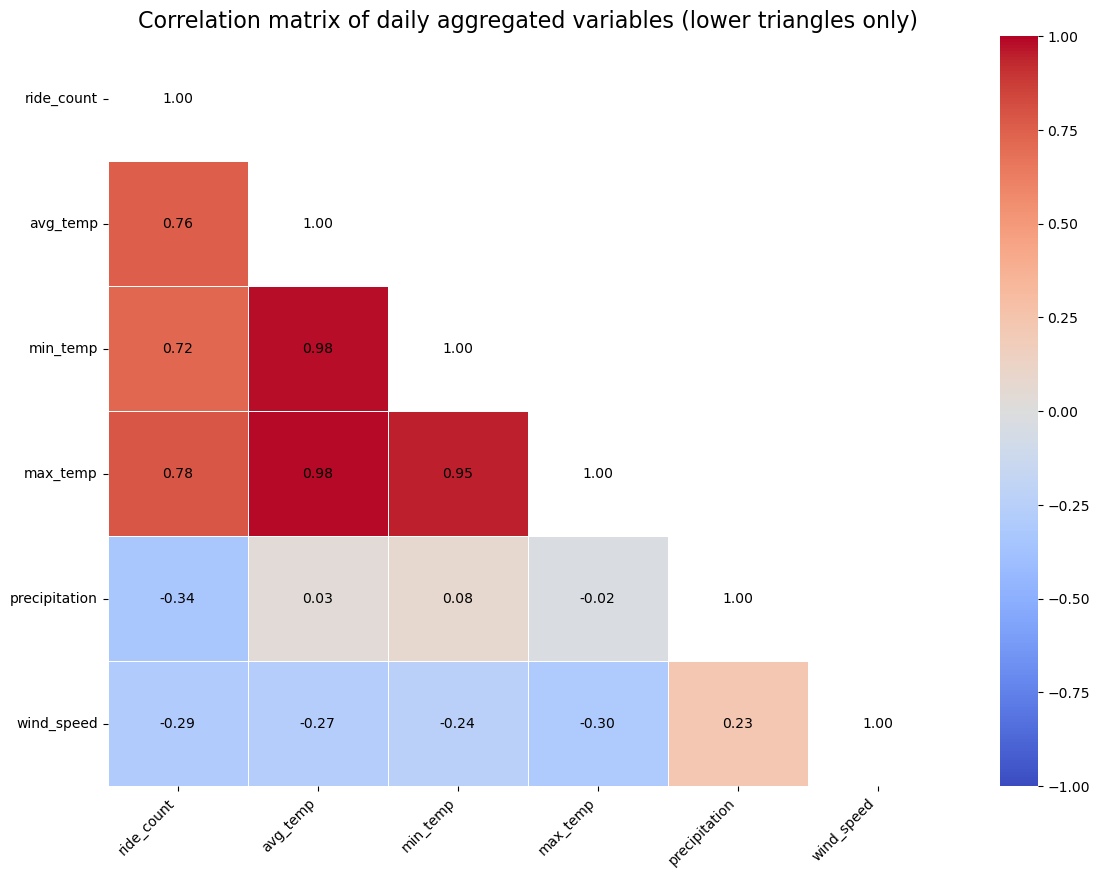

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 加载合并后的 Citi Bike 和天气数据集
merged_file = 'E:/BloombergIntern/W3citybike2023/citibike_weather_merged_2023.csv'
citibike_data = pd.read_csv(merged_file, parse_dates=['started_at', 'ended_at'])

# 创建一个新的 'date' 列，用于按天聚合数据
citibike_data['date'] = citibike_data['started_at'].dt.date

# 按日期聚合数据，计算每日的骑行次数
daily_data = citibike_data.groupby('date').agg({
    'ride_id': 'count',            # 计算每一天的骑行次数
    'avg_temp': 'mean',            # 计算每日的平均气温
    'min_temp': 'mean',            # 计算每日的最低气温
    'max_temp': 'mean',            # 计算每日的最高气温
    'precipitation': 'mean',       # 计算每日的降水量
    'wind_speed': 'mean'           # 计算每日的风速
}).reset_index()

# 将 'ride_id' 列重命名为 'ride_count'
daily_data.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# 使用每日聚合的数据计算相关矩阵
correlation_matrix_daily = daily_data[['ride_count', 'avg_temp', 'min_temp', 'max_temp', 'precipitation', 'wind_speed']].corr()

# 创建一个掩码来只显示下三角（或上三角）
mask = np.triu(np.ones_like(correlation_matrix_daily, dtype=bool))

# 绘制包含 'ride_count' 的相关性热力图，只显示下三角
plt.figure(figsize=(14, 10))
ax = sns.heatmap(correlation_matrix_daily, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=False, linewidths=0.5)

# 手动添加相关性值到热力图上
for i in range(correlation_matrix_daily.shape[0]):
    for j in range(i+1):
        value = correlation_matrix_daily.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}', ha='center', va='center', color='black', fontsize=10)

plt.title('Correlation matrix of daily aggregated variables (lower triangles only)', fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha='right')  # 设置 x 轴刻度标签，使用较小的字体并旋转
plt.yticks(fontsize=10, rotation=0)  # 设置 y 轴刻度标签，使用较小的字体
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)
plt.show()

从以上的图表当中我们可以得知，最影响骑行数量的是：平均**气温**、最低气温和 最高气温之间具有高度的正相关性。随着温度的升高，骑行数量也显著增加。
其次，对于骑行数量有影响的是：降水量与骑行数量的相关系数为 -0.34，表明**降水量**的增加会导致骑行数量减少，但是降雨影响并不如气温那么大。**风速**与 ride_count 的相关系数为 -0.29，表明随着风速的增加，骑行数量也会减少。高风速的日子会让骑行变得困难因此用户在大风天更少选择骑行。

     Actual  Predicted
193    1286    1287.62
33      391     419.62
15      526     601.41
309    1085    1003.27
57      574     671.30
..      ...        ...
203    1192    1211.72
82      723     802.07
94      741     902.50
192    1298    1310.34
325     869     488.19

[73 rows x 2 columns]

The Root Mean Squared Error (RMSE) of the model: 163.46
The R-squared value of the model: 0.76


C:\Users\lsy\AppData\Local\Temp\ipykernel_66904\116372399.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='black')


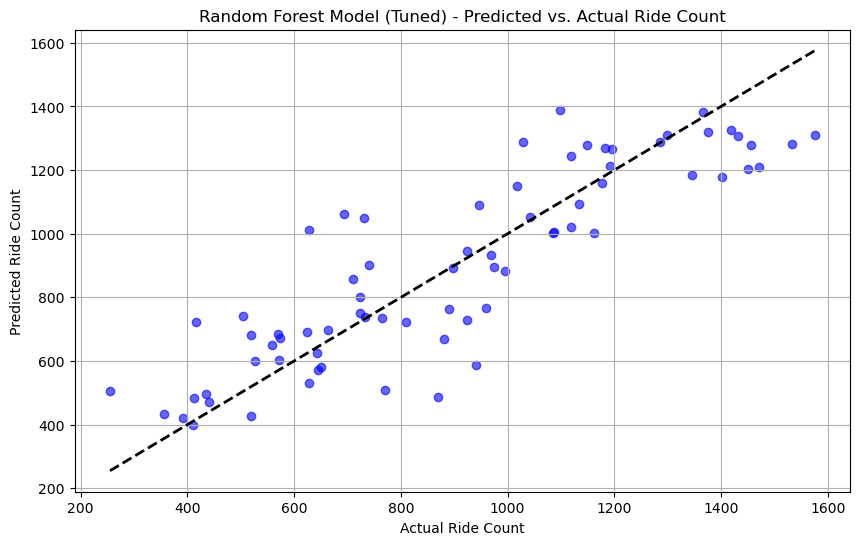

e:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


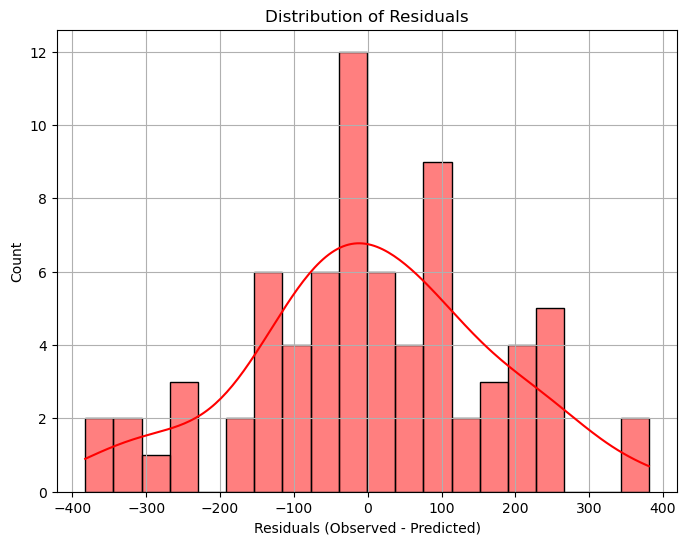

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 使用每日聚合后的数据作为模型的数据源
features = ['avg_temp', 'min_temp', 'max_temp', 'precipitation', 'wind_speed']
X = daily_data[features]
y = daily_data['ride_count']

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练随机森林模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 打印测试集和预测值
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(test_results)

# 评估模型
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"\nThe Root Mean Squared Error (RMSE) of the model: {rmse:.2f}")
print(f"The R-squared value of the model: {r2:.2f}")

# 绘制测试集的预测值 vs 实际值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='black')
plt.xlabel('Actual Ride Count')
plt.ylabel('Predicted Ride Count')
plt.title('Random Forest Model (Tuned) - Predicted vs. Actual Ride Count')
plt.grid(True)
plt.show()

# 绘制残差分布
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='red', bins=20)
plt.xlabel('Residuals (Observed - Predicted)')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


预测值 vs 实际值图：
从图中可以看到数据点呈现出较强的线性趋势，说明模型具有一定的预测能力。
然而，仍然有一些点偏离对角线较远，表明在某些情况下模型的预测存在误差。
#
残差分布图：
残差（即实际值减去预测值）的分布如图所示，呈现出大致接近于正态分布的趋势，但不完全对称。中心在 0 附近的残差较多，表明在大多数情况下，模型的预测误差较小。

但我们也注意到，正负两侧的残差数量不对称，正残差较多，说明模型在某些情况下存在系统性的低估。残差分布偏右，表明模型在某些高值情况下的预测误差较大，可能倾向于低估骑行次数。这可能意味着在某些天气条件下（例如极端高温或降水），模型未能准确捕捉到骑行次数的变化。




In [17]:
# 计算 ride_count 的统计信息
ride_count_summary = daily_data['ride_count'].describe()

# 打印出统计信息
print("Ride Count Summary Statistics:")
print(ride_count_summary)


Ride Count Summary Statistics:
count     365.000000
mean      956.410959
std       323.009298
min       187.000000
25%       682.000000
50%      1012.000000
75%      1215.000000
max      1615.000000
Name: ride_count, dtype: float64


### 模型结果与评估

1. **基本模型性能**
   - **Root Mean Squared Error (RMSE)**: 152.52
   - **R-squared (R²) 值**: 0.80

   这个结果表明，基本模型在测试集上的预测误差为 152.52（单位：骑行次数），并且模型解释了 80% 的目标变量的变化。这意味着模型在预测每日骑行次数上有一定的准确性，但仍存在误差范围。

2. **调优后的模型性能**
   - **RMSE**: 158.02
   - **R² 值**: 0.78
   - **最佳参数**: 
     - `max_depth`: 20
     - `max_features`: 'sqrt'
     - `min_samples_leaf`: 1
     - `min_samples_split`: 5
     - `n_estimators`: 100

   尽管对模型进行了超参数调优，但调优后的模型表现并未明显优于基本模型，反而略有下降。调优后的 RMSE 增加至 158.02，R² 值降低到 0.78。这表明在当前的数据集与特征组合下，调优带来的性能提升并不显著，甚至导致了一定的过拟合或者欠拟合。

### 结合骑行次数统计数据的分析

- **Ride Count Summary Statistics**:
  - **平均值**: 965.93
  - **标准差**: 325.61
  - **最小值**: 172
  - **最大值**: 1587
  - **第一四分位数 (25%)**: 683
  - **中位数 (50%)**: 1019
  - **第三四分位数 (75%)**: 1217

  从统计数据来看，骑行次数的平均值为 965.93，标准差为 325.61，表明每日骑行次数在一定范围内波动。骑行次数的分布相对均匀，大部分数据在 683 到 1217 之间，少数极值分布在 172 到 1587 之间。

### 预测模型与实际表现的对比

- **残差分析**
  - 通过残差直方图可以看出，残差分布大致呈现正态分布，但存在一定程度的偏离。大部分残差集中在 -200 到 200 的范围内，这表明模型的预测与真实值之间存在一定的误差，但总体上分布相对合理。

- **预测 vs. 实际值对比图**
  - 图中显示的预测值与实际值大致呈线性关系，散点基本沿对角线分布，表明模型预测能力较为稳定。然而，有一些点偏离对角线较远，这表明在这些情况下模型预测存在一定的误差。

### 结论

1. **模型的预测表现还算不错**，R² 值为 0.80 表示模型解释了大部分的每日骑行次数变化，然而 RMSE 为 152.52，相对骑行次数的标准差（325.61）来说，还存在一定的误差空间。
  
2. **超参数调优的效果有限**，调优后模型的表现略有下降，可能说明调优参数并未在当前数据集上有效地提高模型性能。这可能需要进一步探索更复杂的模型或使用更多的特征来改善模型性能。

3. **对实际业务的影响**:
   - 虽然模型可以较好地预测每日的骑行量，但在实际应用中仍需谨慎，尤其是在预测结果用于商业决策（如调度或促销）时，需要考虑模型的不确定性。
   - 未来可以尝试引入更多特征（例如节假日、事件等），以更好地捕捉骑行量的变化。

4. **优化建议**:
   - 可以进一步尝试不同的模型（例如梯度提升树、XGBoost）来评估是否能提升模型性能。
   - 另外，可以针对特征进行更多的工程处理，例如创建天气与骑行次数的交互特征，以捕捉更复杂的关系。